In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Import Database 

In [6]:
df = pd.read_csv('./dataset/heartData2.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### Cek NULL Data

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
print('Data Shape:')
print('-----------')
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

Data Shape:
-----------
Rows: 303
Columns: 14


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [11]:
list(df.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

<hr>

The dataset contains the following features:
1. age(in years)
2. sex: (1 = male; 0 = female)
3. cp: chest pain type ((1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0 ( with 1 = Yes has disease, and 0= No disease 

### Distribusi Umur

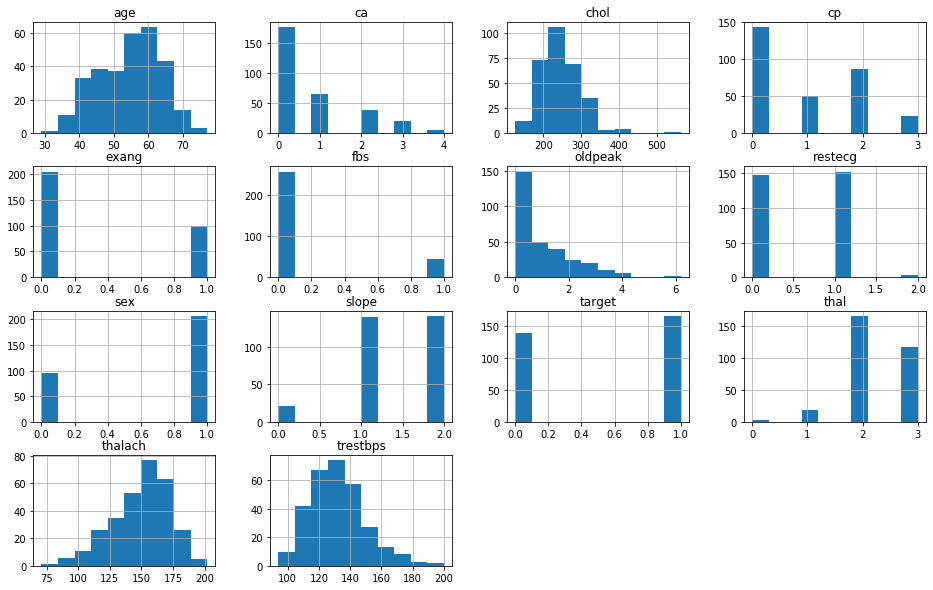

In [12]:
hist = df.hist(bins = 10, figsize=(16, 10))

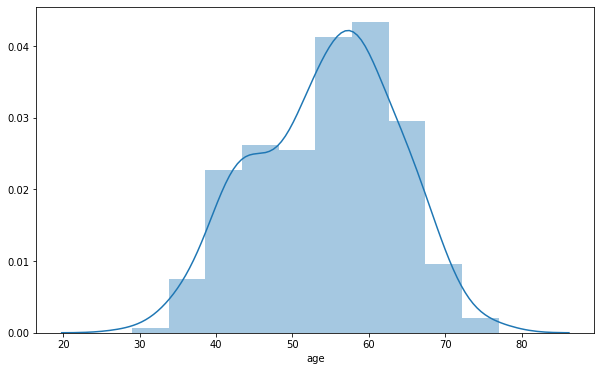

In [13]:
plt.figure(figsize=(10, 6))
sb.distplot(df['age'], bins=10)
plt.show()

In [14]:
print('Usia Maximum:', df['age'].max(), 'Tahun')
print('Usia Minimum:', df['age'].min(), 'Tahun')

Usia Maximum: 77 Tahun
Usia Minimum: 29 Tahun


### Plot: Distribusi data Heart Disease - Non Heart Disease

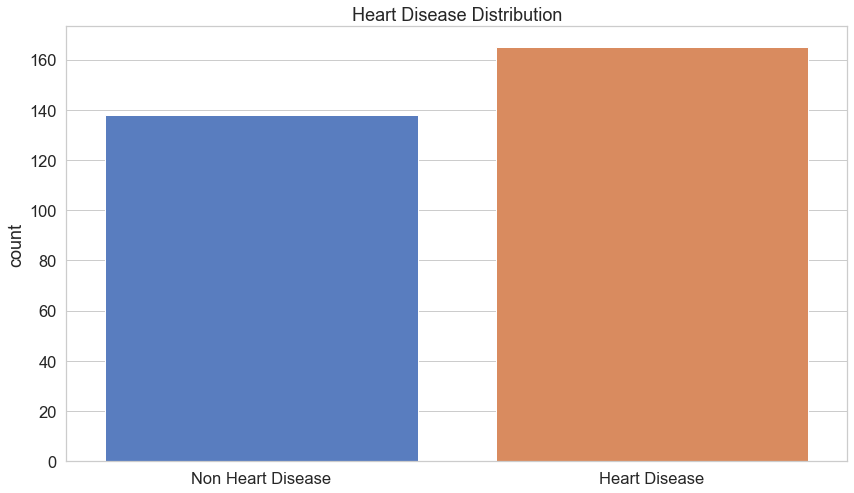

In [15]:
sb.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.figure(figsize=(14, 8))
p = sb.countplot(x='target', data=df)
p.set_title("Heart Disease Distribution")
p.set_xticklabels(['Non Heart Disease', 'Heart Disease'])
plt.xlabel("");

### Plot: Distribusi data Gender - Heart Disease

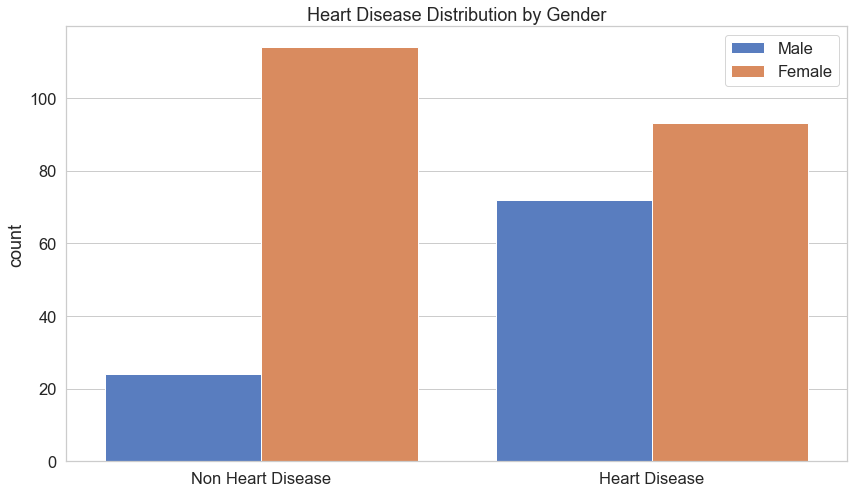

In [16]:
sb.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.figure(figsize=(14, 8))
p = sb.countplot(x='target', data=df, hue='sex')
p.set_title("Heart Disease Distribution by Gender")
p.set_xticklabels(['Non Heart Disease', 'Heart Disease'])
plt.legend(['Male', 'Female'])
plt.xlabel("");

### Plot: Distribusi data Age - Heart Disease

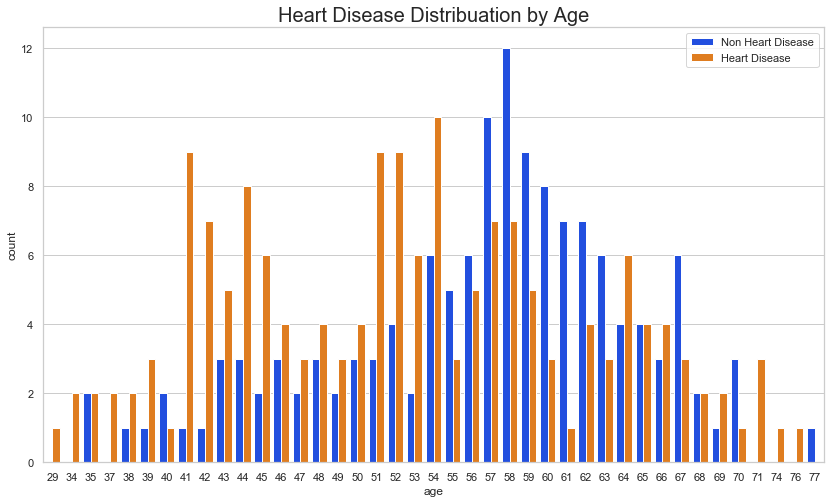

In [17]:
sb.set(style='whitegrid', palette='bright', font_scale=1)

plt.figure(figsize=(14, 8)) 
plt.title('Heart Disease Distribuation by Age', size=20)
sb.countplot(x='age', data=df, hue='target')
plt.legend(['Non Heart Disease', 'Heart Disease'], loc = 1)
plt.show()

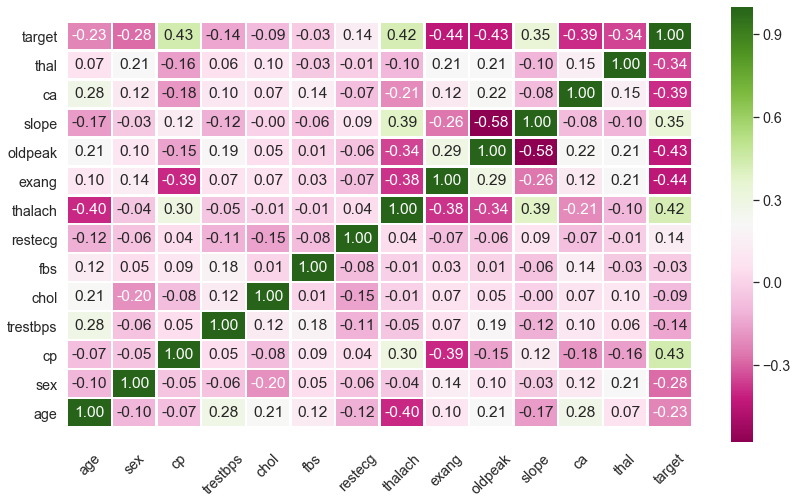

In [18]:
sb.set(style='whitegrid', palette='pastel', font_scale=1.3)

plt.figure(figsize=(14, 8))
hMap = sb.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidths=1.5, cmap="PiYG")
hMap.set_xticklabels(hMap.get_xticklabels(), rotation=45); 
hMap.set_ylim(-0.5, 14.5)
plt.show()

### Drop Target

In [19]:
# Select the columns to use for prediction in the neural network
dfFeature = df.drop('target',axis=1)
dfTarget = df['target']

print(dfFeature.shape, dfTarget.shape)

(303, 13) (303,)


In [20]:
from sklearn.model_selection import train_test_split

### Train Test Split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(dfFeature, dfTarget, test_size=0.2, random_state=42)
print("Data Awal :", len(dfFeature))
print("Data Training :", len(x_train))
print("Data Test :", len(x_test))

Data Awal : 303
Data Training : 242
Data Test : 61


### Normalize using MinMaxScaler

In [22]:
scaler = MinMaxScaler()
x_train_scale = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scale)

x_test_scale = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scale)

print (x_train.shape, y_train.shape)
print (x_train.shape, y_test.shape)
print(x_train_scale[:5])

(242, 13) (242,)
(242, 13) (61,)
[[0.27083333 1.         0.33333333 0.26530612 0.37875289 0.
  0.5        0.64912281 0.         0.         1.         0.
  0.66666667]
 [0.60416667 1.         0.         0.57142857 0.32101617 0.
  0.         0.20175439 1.         0.14285714 1.         0.
  1.        ]
 [0.35416667 1.         0.66666667 0.57142857 0.23094688 0.
  0.5        0.51754386 0.         0.64285714 0.5        0.
  0.66666667]
 [0.54166667 0.         0.33333333 0.41836735 0.27482679 0.
  0.         0.64035088 0.         0.25       0.5        0.
  0.66666667]
 [0.64583333 1.         0.         0.23469388 0.22863741 1.
  0.5        0.63157895 1.         0.25       1.         0.5
  1.        ]]


### Cek Coefficient tiap Feature

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
list_column = list(df.columns)
list_column.remove('target')
list_column

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [25]:
model = LogisticRegression(multi_class='auto', solver='liblinear')

In [26]:
model.fit(x_train, y_train)
y_prediksi = model.predict(x_test)

print('Akurasi Logistic Regression:', accuracy_score(y_test, y_prediksi)*100, '%')

Akurasi Logistic Regression: 85.24590163934425 %


In [27]:
array_coef = np.round(np.abs(model.coef_[0]), 4)
array_coef

array([0.3433, 1.2448, 1.7807, 0.6084, 0.2784, 0.1721, 0.6452, 1.3695,
       1.0679, 1.6063, 1.4008, 1.9762, 1.2574])

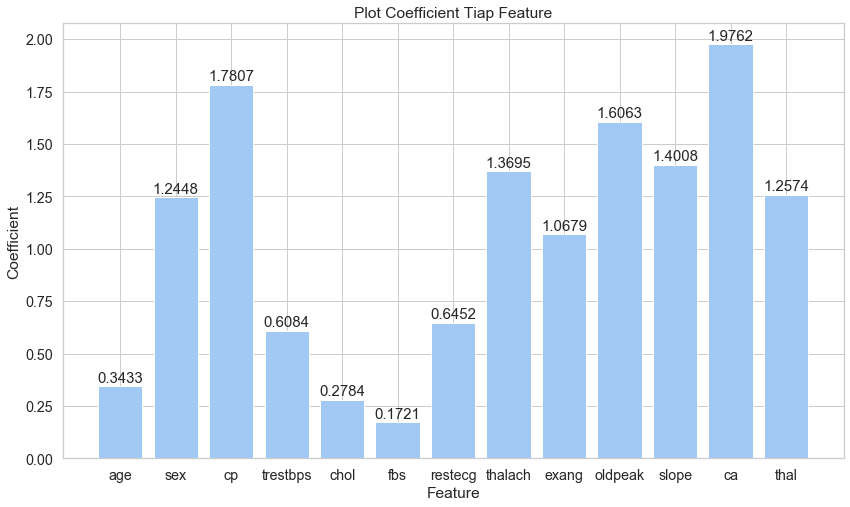

In [28]:
np.set_printoptions(precision=4)
plt.figure(figsize=(14, 8))
plt.bar(list_column, array_coef)
for i in range(len(list_column)):
    plt.text(i, array_coef[i]+0.04, array_coef[i], size=15,
            horizontalalignment='center',verticalalignment='center')

plt.xlabel('Feature')
plt.ylabel("Coefficient")  
plt.title('Plot Coefficient Tiap Feature')
plt.show()

### Beberapa Fungsi untuk membantu Training Model

In [29]:
# Define some useful callbacks
#Reduce learning rate when a metric has stopped improving.
reducelrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=30, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
# Stop training when a monitored quantity has stopped improving. 
# By default, mode is set to ‘auto‘ and knows that you want to minimize loss or maximize accuracy.
early_stopping_monitor=EarlyStopping(monitor='val_loss',verbose=1, patience=30, baseline=0.4, )
# Save the model after every epoch.
best_trained_model_file= 'best_trained_model.h5'
checkpoint = ModelCheckpoint(best_trained_model_file, verbose=0, monitor='val_loss',save_best_only=True, mode='auto')  
#place callbacks want to enable on this list
callbacks=[checkpoint, reducelrp]

### Training Model

In [30]:
model = Sequential()
model.add(Dense(12, input_dim=13, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="Adamax", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                168       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(x_train, y_train, validation_split=0.33, epochs=100, batch_size=6, callbacks=callbacks,verbose=0)

### Evaluasi Model

In [32]:
model.evaluate(x_test, y_test)

61/61 [==============================] - 0s 62us/step


[0.38194115386634575, 0.868852436542511]

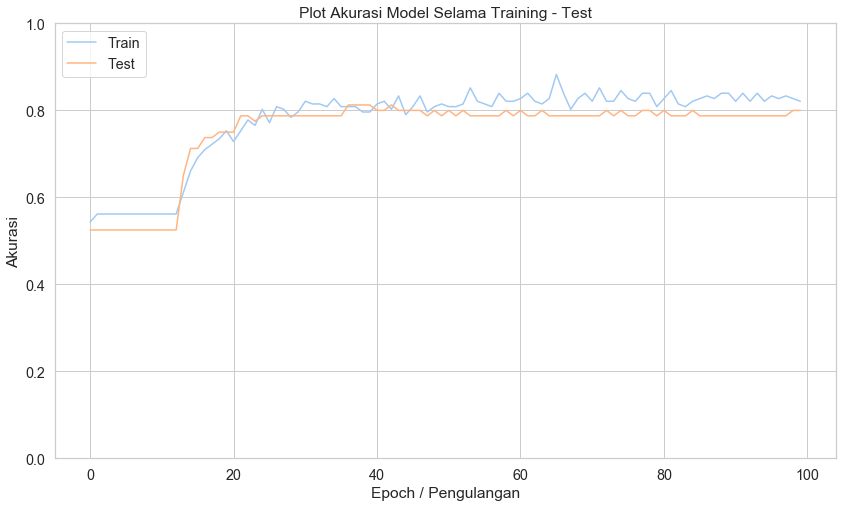

In [55]:
plt.figure(figsize=(14, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Plot Akurasi Model Selama Training - Test')
plt.ylabel('Akurasi')
plt.xlabel('Epoch / Pengulangan')
plt.ylim((0, 1))
plt.legend(['Train', 'Test'], loc=2);

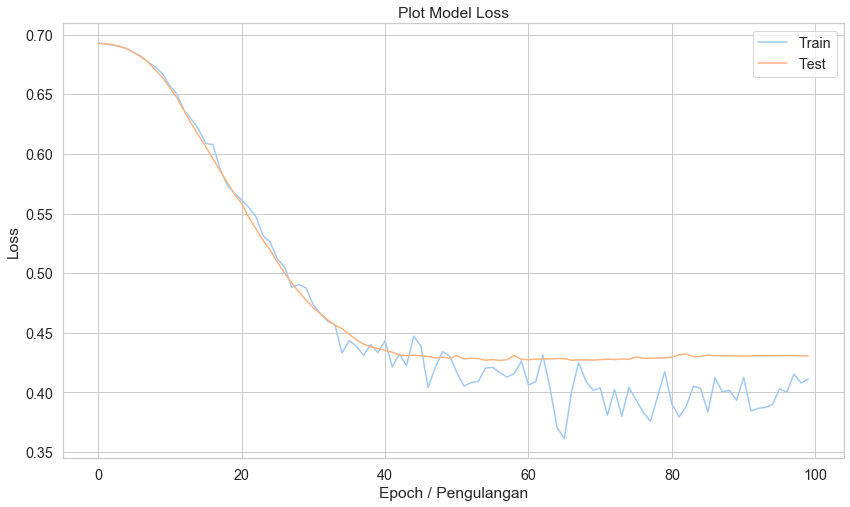

In [58]:
plt.figure(figsize=(14, 8))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch / Pengulangan')
plt.legend(['Train', 'Test'], loc=1)
plt.show()

In [52]:
from sklearn.metrics import accuracy_score

print("Model prediction test")

# Prediksi Class
y_pred_class = model.predict_classes(x_test)

# Probability
y_pred_proba = model.predict(x_test)

print (" Actual Class | Predicted Class | Probability  ")
for index, label in enumerate(y_test):
    print ("%s     | %s  | %s |   %.2f%%" % (str(index), str(label), str(y_pred_class[index]), float(y_pred_proba[index])*100))

# Accuracy Score
print ("Skor akurasi dengan keras: %.2f%%" %  (accuracy_score(y_test, y_pred_class)*100))

Model prediction test
 Actual Class | Predicted Class | Probability  
0     | 0  | [0] |   12.96%
1     | 0  | [1] |   78.23%
2     | 1  | [1] |   95.30%
3     | 0  | [0] |   14.33%
4     | 1  | [1] |   96.94%
5     | 1  | [1] |   93.44%
6     | 1  | [1] |   60.67%
7     | 0  | [0] |   9.74%
8     | 0  | [0] |   7.85%
9     | 1  | [0] |   27.29%
10     | 1  | [1] |   72.09%
11     | 1  | [0] |   17.89%
12     | 1  | [1] |   94.15%
13     | 0  | [0] |   13.33%
14     | 1  | [1] |   98.64%
15     | 1  | [1] |   92.73%
16     | 1  | [1] |   98.86%
17     | 0  | [0] |   21.78%
18     | 0  | [0] |   9.96%
19     | 0  | [0] |   8.68%
20     | 1  | [1] |   70.26%
21     | 0  | [0] |   10.79%
22     | 0  | [0] |   23.19%
23     | 1  | [1] |   96.25%
24     | 1  | [1] |   96.70%
25     | 0  | [1] |   92.40%
26     | 0  | [1] |   89.38%
27     | 1  | [0] |   31.67%
28     | 0  | [0] |   15.55%
29     | 1  | [1] |   95.57%
30     | 1  | [0] |   12.14%
31     | 0  | [0] |   11.65%
32     | 0  | [0

### Classification Report

In [51]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Confusion Matrix 

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[26,  3],
       [ 5, 27]])

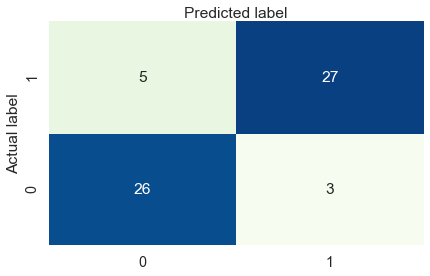

In [61]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sb.heatmap(pd.DataFrame(cm),annot=True,cmap="GnBu",fmt="d",cbar=False)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label');
plt.ylim(0, 2)
plt.show()

### Save and Export Model

In [36]:
# save trained model
trained_model_file="./model2/trained_heart_model.h5"
model.save(trained_model_file)
print("Saved trained model to disk as h5 file :", trained_model_file)

Saved trained model to disk as h5 file : ./model2/trained_heart_model.h5
